## ARIMA-model

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [17]:
var_set = pd.read_csv('var_set.csv', parse_dates=[0],index_col=[0])

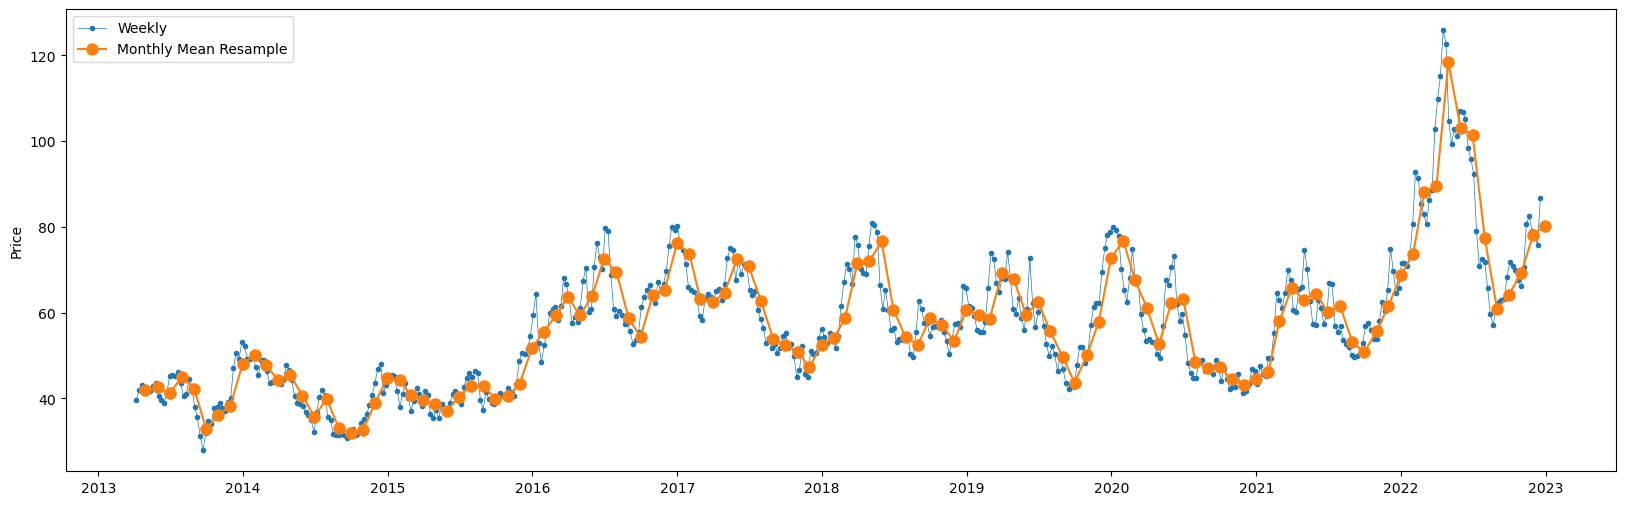

In [19]:
y = var_set['SalmonPrice']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Price')
ax.legend();
plt.savefig('Figures/MonthlyMeanPlot.png')

In [20]:
var_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2013-04-07 to 2022-12-18
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalmonPrice   507 non-null    float64
 1   CodPrice      507 non-null    float64
 2   HalibutPrice  507 non-null    float64
 3   CPI           507 non-null    float64
dtypes: float64(4)
memory usage: 19.8 KB


In [21]:
dftest1 = adfuller(var_set.SalmonPrice, autolag="AIC") 

print(dftest1)

if dftest1[1] < 0.05:
  print("Salmon price is stationary.")
else:
  print("Salmon price is not stationary at a 5% sig-level.")

(-2.812510810763278, 0.05650879088743324, 3, 503, {'1%': -3.4434175660489905, '5%': -2.8673031724657454, '10%': -2.5698395516760275}, 2680.129894878004)
Salmon price is not stationary at a 5% sig-level.


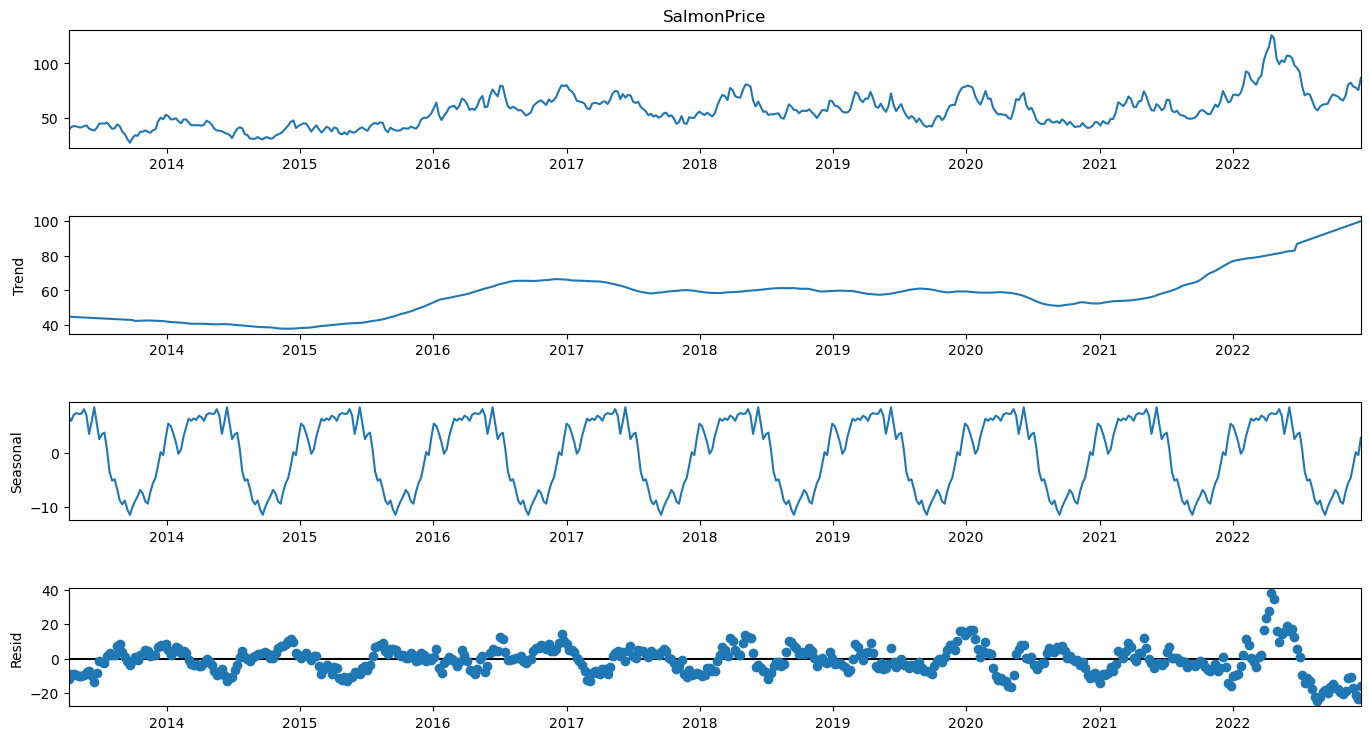

In [22]:
decomposition = sm.tsa.seasonal_decompose(var_set["SalmonPrice"], model='additive',extrapolate_trend='freq')
fig = decomposition.plot()
fig.set_size_inches(15,8)
plt.savefig('Figures/SeasonalDecompose.png')
plt.show()

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/vrognaas/opt/anaconda3/envs/bachelor2023/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


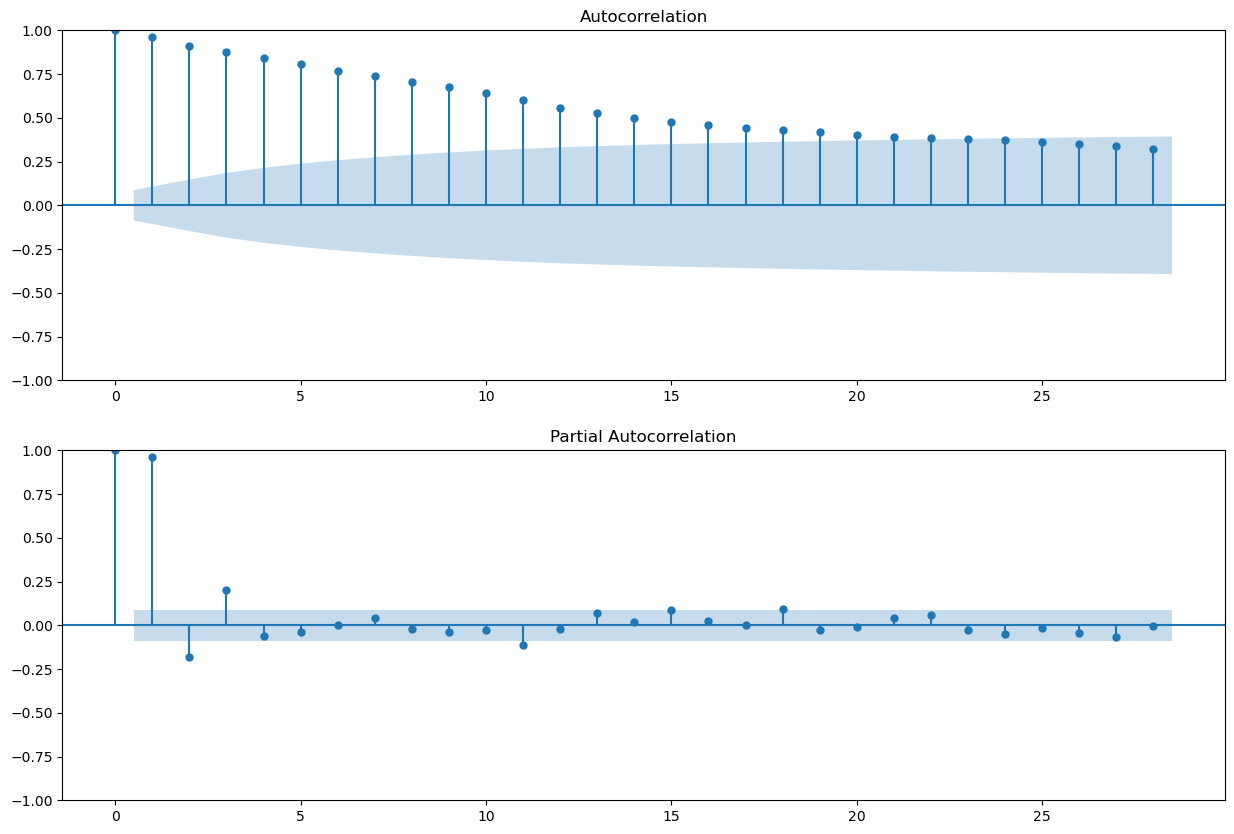

In [23]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
plot_acf(var_set.SalmonPrice, ax=ax[0])
plot_pacf(var_set.SalmonPrice, ax=ax[1])

plt.savefig('Figures/OriginalACF-PACF.png')
plt.show()